<div align='center'>

# Lab03 - Logistic Regression

<div/>

This lab aims to build **Logistic Regression** models to predict the survival using the Titanic dataset.

## 1. Load Neccessary Packages

Notebook Colors:


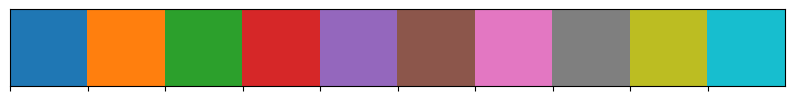

In [1]:
# Import the neccessary packages

import os 
import pandas as pd
from utils import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class clr:
    # Reset
    E = "\033[0m"
    # Colors
    R = "\033[91m"   # Red
    G = "\033[92m"   # Green
    Y = "\033[93m"   # Yellow
    B = "\033[94m"   # Blue
    M = "\033[95m"   # Magenta
    C = "\033[96m"   # Cyan
    W = "\033[97m"   # White

my_colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # yellow-green
    "#17becf"   # cyan
]

print(clr.G+'Notebook Colors:'+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

## 2. Load Dataset

In [2]:
# Use the load_dataset(file_path) from utils to load the dataset

try:
    df = load_dataset('Titanic-Dataset.csv')
    print(clr.G+'Dataset loaded successfully ✅!! Congratulations ✨'+clr.E, '\n\n')
except Exception as e:
    print(clr.R+f'Failed to load dataset ❌!!\nReason: {e}'+clr.E, '\n\n')

Dataset loaded successfully ✅!! Congratulations ✨ 




## 3. Explanatory Data Analysis

### 3.1 - View Data Important Information

In [3]:
# View the shape of the datset

print(f'Dataset shape (number of examples, number of features): {df.shape}', '\n\n')

Dataset shape (number of examples, number of features): (891, 12) 




In [4]:
# View dataset information

print(clr.G+f'Dataset information: \n\n'+clr.E, df.info, '\n\n')

Dataset information: 

 <bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..           

In [5]:
# View dataset description

print(clr.G+'Dataset Description:'+clr.E)
print(df.describe(), '\n\n')


Dataset Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   




In [6]:
## View some examples of the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 - Get the percentage of the value types 

We want to plot the percentage of value types so that we understand, how many types of data there are. Therefore, we can perform data transformation before fitting into the models.

<Axes: ylabel='count'>

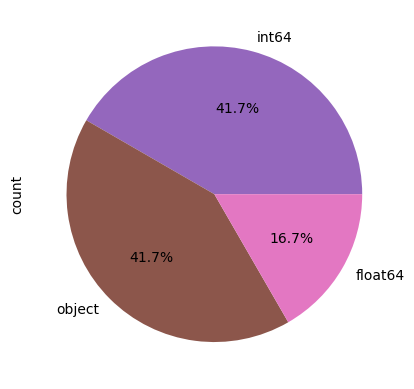

In [7]:
# Plot pie chart to observe the percentage of value types
df.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

=> There are 41.7% of values of type object, => Then we want to look at those features and think of the possible transformations for them.

### 3.3 - Solving missing data and data transformation in the dataset

In [8]:
# This function is used to check the missing values of the dataset

def check_missing(df):
    print(clr.G+'=== Missing Values Information ==='+clr.E)
    print(clr.G+"Total Missing Values: "+clr.E, df.isnull().sum().sum())
    print(clr.G+"Missing values for each features: \n"+clr.E, df.isnull().sum(), '\n\n')

In [9]:
# Check the missing values in the dataset
check_missing(df)

=== Missing Values Information ===
Total Missing Values:  866
Missing values for each features: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 




In [10]:
# Convert 'sex' to numerical
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [11]:
# Handle missing values for Age using median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
# Handle missing values for Embarked
df['Embarked'] = df['Embarked'].fillna('S') # Filling missing values in Embarked with S

In [13]:
# Convert df['Embarked'] to numerical using get_dummies()
df = pd.get_dummies(df, columns=['Embarked'])

# Convert True/False values to 0/1
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

#### Extract "Name" columnn into "Title"

In [14]:
# extract Title from Name
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")  # everything between ',' and '.'

# Count frequencies of each title
title_counts = df["Title"].value_counts()
print(title_counts)

# Get the list of rare titles (which appears under 10 times)
rare_titles = title_counts[title_counts < 10].index

# Replace rare titles with 'Other'
df["Title"] = df["Title"].replace(rare_titles, "Other")
print(df["Title"].nunique())

# One-hot encode the title
df = pd.get_dummies(df, columns=["Title"], prefix="Title")

# Convert True/False values to 0/1
df['Title_Mrs'] = df['Title_Mrs'].astype(int)
df['Title_Mr'] = df['Title_Mr'].astype(int)
df['Title_Master'] = df['Title_Master'].astype(int)
df['Title_Other'] = df['Title_Other'].astype(int)
df['Title_Miss'] = df['Title_Miss'].astype(int)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
5


<Axes: ylabel='count'>

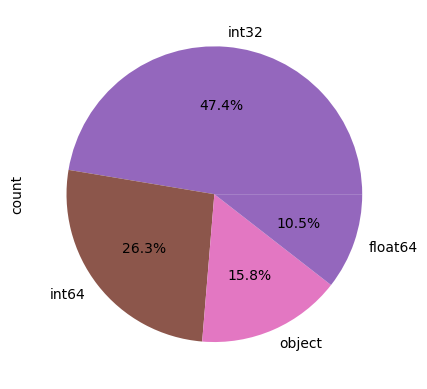

In [15]:
# Plot pie chart to observe the percentage of value types after being processed
df.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

=> After being processed, there is only 15.8% of data right now is of type object (those columns include **Cabin, Name, Ticket**).

1. For **Cabin**, there are too many missing values, so it is quite hard to fill in those missing values. Therefore, I won't include this column in training.
2. For **Name**, because I have extracted **Name** into **Title** columns, I will drop **Name** when training.
3. Finally for **Ticket**, there are many unique values of tickets (681), so it does not represent any patterns, which is not a valuable feature for training. Therefore, I will drop it when training.

### 3.4 - Checking the balance of labels in the dataset

We want to make sure that in the dataset, there is no high imbalance between the labels, in this dataset, the number of labels 0 and 1 must be balanced.

Text(0, 0.5, 'Counts')

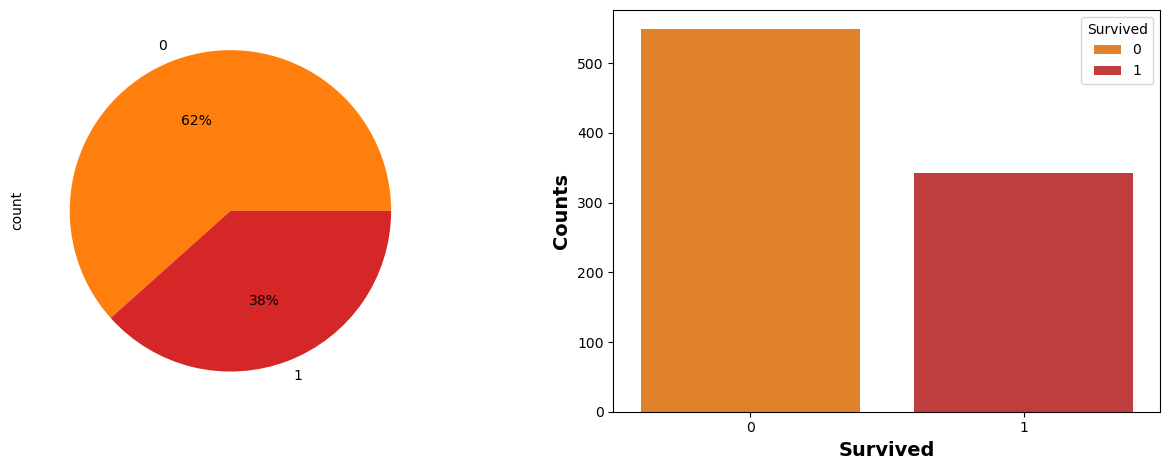

In [16]:
# We will first plot the number of survived and not_survived labels in bar and pie charts

plt.figure(figsize=(24, 24))
plt.subplot(4, 3, 1)
df['Survived'].value_counts().plot(kind='pie', autopct='%0.f%%', colors=[my_colors[1],my_colors[3]])
plt.subplot(4, 3, 2)
sns.countplot(data=df, x='Survived', hue='Survived', palette=[my_colors[1], my_colors[3]])
plt.xlabel('Survived', size=14, weight='bold')
plt.ylabel('Counts', size=14, weight='bold')

=> From the plots, we see that the labels **0** and **1** is not too imbalanced, so we will first keep it and do not perform any solution to this.

### 3.5 - Checking the correlation and collinearity

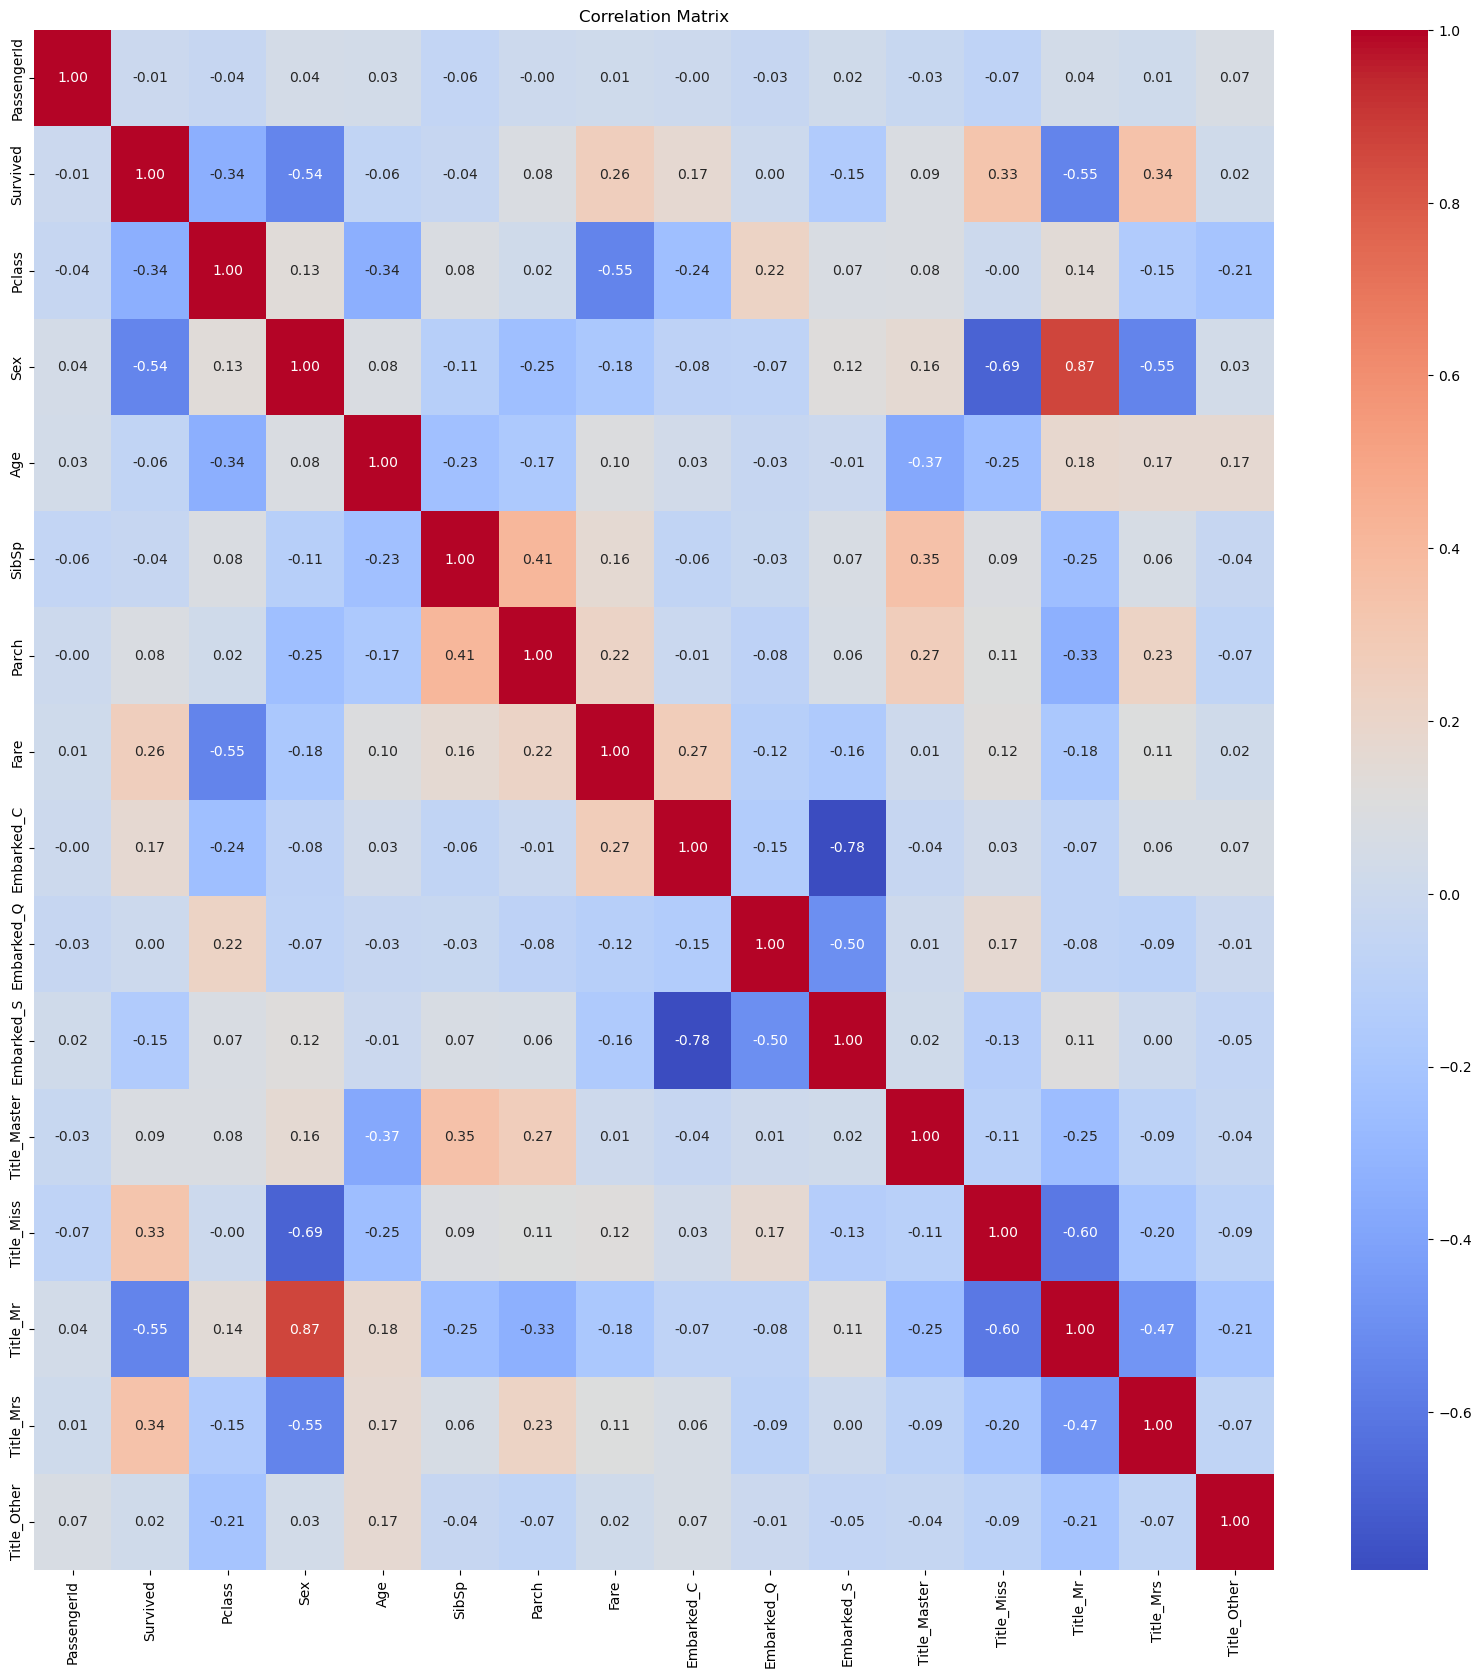

In [17]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# PLot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

=> From the correlation matrix, we see that the **SibSp** and **Parch** are quite correlated and they are all related to members in a family, so we will handle them by summing them and create a new feature. Moreover, the correlation betwen **Title_Mr** and **Sex** is high, so I will drop the column **Title_Mr**.

In [18]:
# Handle the correlation

df['FamilySize'] = df['SibSp'] + df['Parch']

## 4. Split Training and Testing Sets

### 4.1 - Split X and y

In [19]:
print(clr.G+"Number of unique values for Ticket -"+clr.E, df['Ticket'].nunique())

Number of unique values for Ticket - 681


In [20]:
# Drop the unncessary features

df_new = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Title_Mr'], axis=1)

<Axes: ylabel='count'>

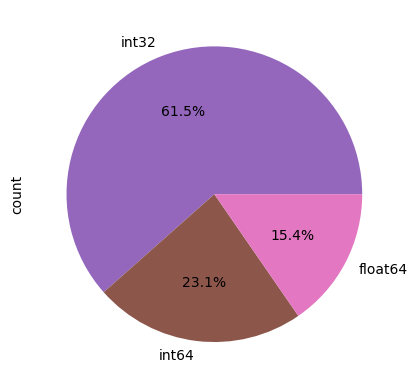

In [21]:
# Plot pie chart to make sure there is no object-type values

df_new.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

In [22]:
# Define X and y

X = df_new.drop(['Survived'], axis=1)
y = df_new['Survived']

### 4.2 - Split training set and test set


In [23]:
# Split the training and test set using train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 42,
    stratify=y
)

In [24]:
feature_names = X_train.columns.tolist()
print(feature_names)

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mrs', 'Title_Other', 'FamilySize']


### 4.3 - Normalization

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Training

### 5.1 - Baseline Logistic Regression with the predefined split_size = 0.2, and max_iter = 100

In [26]:
# Baseline Logistic Regression

log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_scaled, y_train)

y_pred_test = log_reg.predict(X_test_scaled)
y_pred_train = log_reg.predict(X_train_scaled)

print(clr.G+"Baseline Logistic Regression \n\n"+clr.E)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train), "\n\n")
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Baseline Logistic Regression 


Train Accuracy: 0.827247191011236 


Test Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



### 5.2 - Display the Theta Parameters for the baseline logistic model

In [27]:
# Display Theta Parameters

theta = np.concatenate(([log_reg.intercept_[0]], log_reg.coef_[0]))
theta_df = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "Theta": theta
})
print(theta_df)


         Feature     Theta
0      Intercept -0.680713
1         Pclass -0.864882
2            Sex -1.251583
3            Age -0.361463
4           Fare  0.162689
5     Embarked_C  0.059281
6     Embarked_Q  0.099575
7     Embarked_S -0.112486
8   Title_Master  0.601980
9     Title_Miss  0.088490
10     Title_Mrs  0.352034
11   Title_Other  0.078115
12    FamilySize -0.593529


### 5.3 - Prediction on a dummy list of passengers

In [28]:
# Predictions on New Passengers

test_data = pd.DataFrame({
    "Pclass": [1, 3, 2],
    "Sex": [0, 1, 1],
    "Age": [25, 40, 18],
    "Fare": [80.00, 7.75, 13.50],
    "Embarked_C": [1, 0, 0],
    "Embarked_Q": [0, 1, 0],
    "Embarked_S": [0, 0, 1],
    "Title_Master":   [0, 1, 1],
    "Title_Miss": [1, 0, 0],
    "Title_Mrs":  [0, 0, 0],
    "Title_Other":[0, 0, 0],
    "FamilySize": [1, 4, 2],
})

test_scaled = scaler.transform(test_data)  
preds = log_reg.predict(test_scaled)
results = ["Survived" if p == 1 else "Not Survived" for p in preds]

print(pd.DataFrame({"Passenger": [1,2,3], "Prediction": results}))

   Passenger    Prediction
0          1      Survived
1          2  Not Survived
2          3      Survived


### 5.4 - Try to finetune the hyperparameter (C, penalty, solver, max_iter and split_size)

In [29]:
# --- Parameters ---

splits = [0.2, 0.3, 0.4]   # try different test sizes
param_grid = [ # try with valid combinations for penalty and solver
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1"], "solver": ["liblinear", "saga"], "max_iter": [100, 200, 500, 1000]},
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"], "solver": ["liblinear", "saga", "lbfgs", "newton-cg", "sag"], "max_iter": [100, 200, 500, 1000]}
]

results = []

for split in splits:
    print(clr.G+f"\n--- Train/Test Split: {1-split:.0%} train / {split:.0%} test ---"+clr.E)

    # Create split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=split, random_state=42, stratify=y
    )

    # Normalization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Grid Search
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_scaled, y_train)

    print("Best Parameters:", grid.best_params_)
    print("Best Training Accuracy:", grid.best_score_)

    # Evaluate on test set
    best_log_reg = grid.best_estimator_
    y_pred = best_log_reg.predict(X_test_scaled)

    test_acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_acc)
    print(classification_report(y_test, y_pred))

    # Save results
    results.append({
        "split": split,
        "train_acc": grid.best_score_,
        "test_acc": test_acc
    })

# Show summary

df_results = pd.DataFrame(results)
print(clr.Y+"\n=== Summary Across Splits ==="+clr.E)
print(df_results)


--- Train/Test Split: 80% train / 20% test ---
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Training Accuracy: 0.8202895695853443
Test Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179


--- Train/Test Split: 70% train / 30% test ---
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Training Accuracy: 0.8201806451612903
Test Accuracy: 0.832089552238806
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       165
           1       0.80      0.76      0.78       103

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82

### 5.5 - Try to finetune the hyperparameter (C, penalty, solver, max_iter and split_size) for Polynomial Features

In [30]:
# --- Parameters ---

splits = [0.2, 0.3, 0.4]   # try different test sizes
param_grid = [ # try with valid combinations for penalty and solver
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1"], "solver": ["liblinear", "saga"], "max_iter": [100, 200, 500, 1000]},
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"], "solver": ["liblinear", "saga", "lbfgs", "newton-cg", "sag"], "max_iter": [100, 200, 500, 1000]}
]

results = []

for split in splits:
    print(clr.G+f"\n--- Train/Test Split: {1-split:.0%} train / {split:.0%} test ---"+clr.E)

    # Create split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=split, random_state=42, stratify=y
    )

    # Normalization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Polinomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Grid Search
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_poly, y_train)

    print("Best Parameters:", grid.best_params_)
    print("Best Training Accuracy:", grid.best_score_)

    # Evaluate on test set
    best_log_reg = grid.best_estimator_
    y_pred = best_log_reg.predict(X_test_poly)

    test_acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_acc)
    print(classification_report(y_test, y_pred))

    # Save results
    results.append({
        "split": split,
        "train_acc": grid.best_score_,
        "test_acc": test_acc
    })

# Show summary

df_results = pd.DataFrame(results)
print(clr.Y+"\n=== Summary Across Splits ==="+clr.E)
print(df_results)


--- Train/Test Split: 80% train / 20% test ---


C:\Users\PC\anaconda3\envs\appliedML\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Training Accuracy: 0.8272924258839751
Test Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179


--- Train/Test Split: 70% train / 30% test ---


C:\Users\PC\anaconda3\envs\appliedML\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best Training Accuracy: 0.8378064516129033
Test Accuracy: 0.8432835820895522
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       165
           1       0.84      0.74      0.78       103

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268


--- Train/Test Split: 60% train / 40% test ---
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Training Accuracy: 0.8221830365014988
Test Accuracy: 0.834733893557423
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       220
           1       0.85      0.69      0.76       137

    accuracy                           0.83       357
   macro avg       0.84      0.81      0.82       357
weighted avg       0.84      0.83    